<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/Merged_Data_Feature_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating each Features ability to predict Housing Affordability

Open the dataset

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ADS Datasets/mergedDataV1.csv")

df = df.drop("Unnamed: 0", axis=1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,mortgage_rate,country,affordability,population,avg_inflation_rate
0,2001.0,72.616667,E,4.50,49449746,1.233333
1,2001.0,72.616667,W,3.33,2910232,1.233333
2,2002.0,72.641667,E,5.12,49679267,1.258333
3,2002.0,72.641667,W,3.71,2922876,1.258333
4,2003.0,72.775000,E,5.93,49925517,1.358333


Find statistics about correlations of features with price-to-earnings + linear regression with features individually.

In [3]:
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

countries = np.unique(df["country"])
for country in countries:
    print("Country: "+country)
    # Get labels for country
    countryDf = df.loc[df["country"] == country]
    affordData = np.array(countryDf["affordability"])

    # Plot all scatters
    for col in df.columns:
        if(col == "affordability" or col == "country"):
            continue

        colData = np.array(countryDf[col]).reshape(-1, 1)

        lr = LinearRegression()
        scores = cross_val_score(lr,
                                colData,
                                affordData,
                                cv=20,
                                scoring="neg_mean_squared_error")

        print("Feature: "+col)
        print("Pearsons correlation coefficent: "+str(r_regression(colData, affordData)[0]))
        print("Average linear regression CV accuracy: "+str(-1 * np.mean(scores)))
        print()
    print()

Country: E
Feature: year
Pearsons correlation coefficent: 0.8553401414284783
Average linear regression CV accuracy: 0.2752052011630581

Feature: mortgage_rate
Pearsons correlation coefficent: 0.5110525791060611
Average linear regression CV accuracy: 0.6709708002536596

Feature: population
Pearsons correlation coefficent: 0.8368203319497978
Average linear regression CV accuracy: 0.3038848192035438

Feature: avg_inflation_rate
Pearsons correlation coefficent: 0.06205205379801624
Average linear regression CV accuracy: 0.9379387267978654


Country: W
Feature: year
Pearsons correlation coefficent: 0.5134058228280195
Average linear regression CV accuracy: 0.6174301587729614

Feature: mortgage_rate
Pearsons correlation coefficent: 0.1137894697866146
Average linear regression CV accuracy: 0.7098807944442077

Feature: population
Pearsons correlation coefficent: 0.56242658328429
Average linear regression CV accuracy: 0.5803969520270098

Feature: avg_inflation_rate
Pearsons correlation coefficent

Linear model with all features together

In [4]:
lms = []
for country in countries:
    countryData = df.loc[df["country"] == country].drop("country", axis=1)
    countryYs = countryData.pop("affordability")
    countryXs = countryData

    lm = LinearRegression().fit(countryXs, countryYs)
    lms.append(lm)
    print(country+", r^2: "+str(lm.score(countryXs, countryYs)))

E, r^2: 0.8756626103152405
W, r^2: 0.6616820444221214


Do some plots (everything other than indep. variable is the mean)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


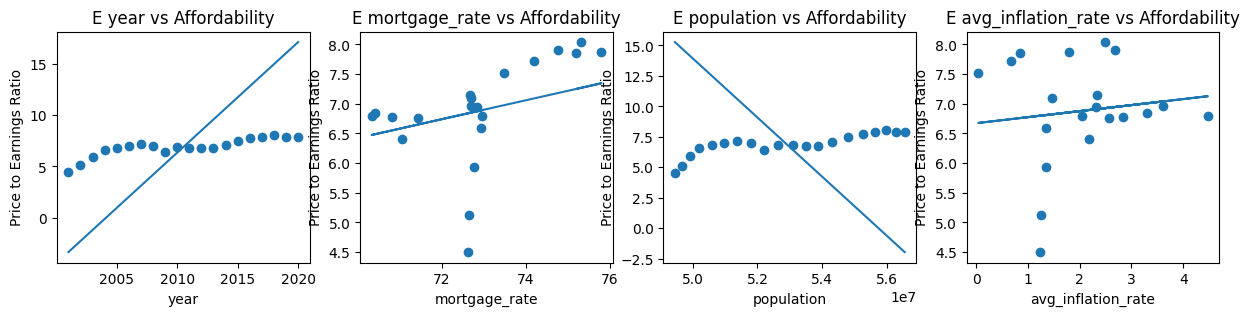

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


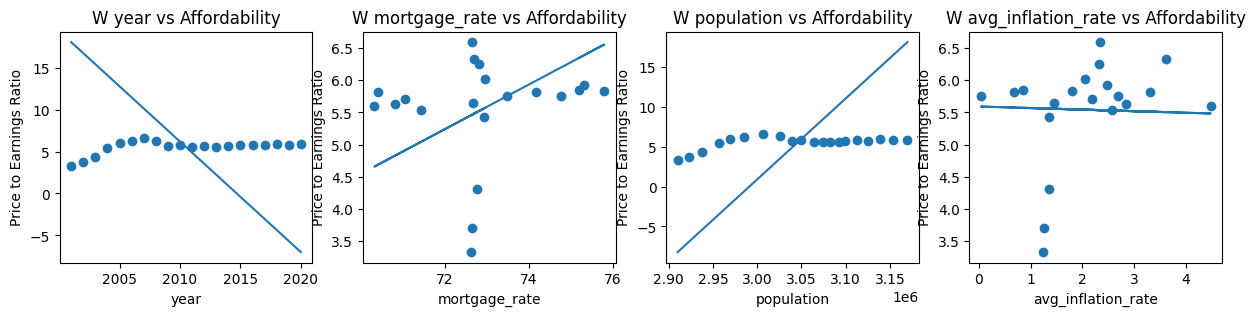

In [7]:
import matplotlib.pyplot as plt

for i, country in enumerate(countries):
    fig, axes = plt.subplots(1, 4, figsize=(15, 3))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Means
    means = np.mean(countryDf, axis=0)

    # Plot all scatters
    for j, col in enumerate(countryDf.columns):
        colData = np.array(countryDf[col]).reshape(-1, 1)

        # Model predictions
        x = np.tile(means, (len(countryDf), 1))
        x[:, j] = colData.reshape(-1,)
        preds = lms[i].predict(x)

        # Plot
        axes[j].scatter(colData, affordData)
        axes[j].set_title(country+" "+col+" vs Affordability")
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Price to Earnings Ratio")
        axes[j].plot(colData, preds)
    plt.show()



Plots but all variables vary over time

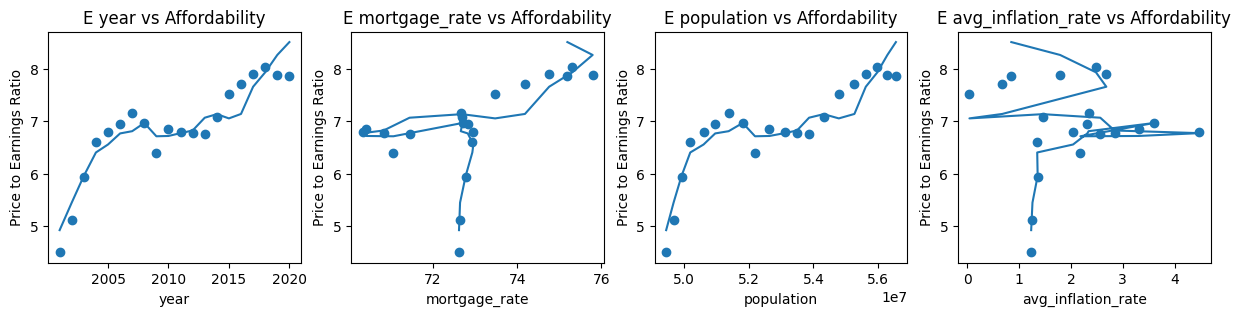

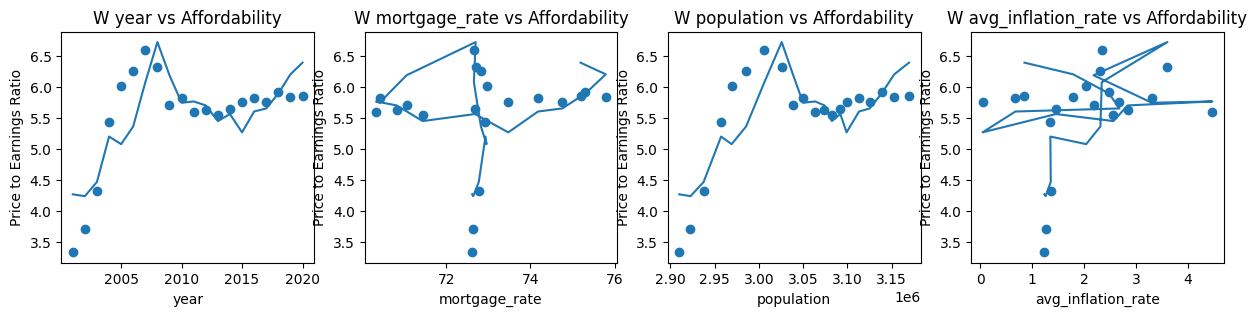

In [8]:
for i, country in enumerate(countries):
    fig, axes = plt.subplots(1, 4, figsize=(15, 3))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Model predictions
    preds = lms[i].predict(countryDf)

    # Plot all scatters
    for j, col in enumerate(countryDf.columns):
        colData = np.array(countryDf[col]).reshape(-1, 1)

        # Plot
        axes[j].scatter(colData, affordData)
        axes[j].set_title(country+" "+col+" vs Affordability")
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Price to Earnings Ratio")
        axes[j].plot(colData, preds)
    plt.show()

